### K-Nearest Neighbour KNN
--> K-value means that number of Neighbour a Datapoint will Have.

--> when K-value is even then nearest neighbour's Class is Consider

--> when k-value is odd then majority of Neighbour's class is Consider

In [1]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [2]:
#Load the data set
cancer = pd.read_csv("C:/Users/Akaash/Downloads/cancer.csv")
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Complete Cancer dataset - applying lable encoder to species column - (Y Variable is Categorial)
label_encoder = preprocessing.LabelEncoder()
cancer['diagnosis'] = label_encoder.fit_transform(cancer['diagnosis']) 

In [4]:
# Dividing our data into input and output variables 
X = cancer.iloc[:,1:]
Y = cancer.iloc[:,0]

In [5]:
#Creating the k-folds 
num_folds = 10
kfold = KFold(num_folds)

In [6]:
#KNN Instance
model = KNeighborsClassifier(n_neighbors=20) # initially taking K-value = 20
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean()*100)

92.80388471177945


Inference: When Initially took k-value of 20 then the accuracy came 92.80%, Now will hyper Tune the parameter Using Grid Search CV

#### Grid Search CV for Parameter Tuning

In [7]:
#Loading the Required library
from sklearn.model_selection import GridSearchCV

In [8]:
#Giving Multiple Value of K By using a Range
n_neighbors = np.array(range(1,51))
param_grid = dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])}

In [9]:
#Creating Model Instance (KNN)
model = KNeighborsClassifier()

#Grid Search Instance
grid = GridSearchCV(estimator=model, param_grid=param_grid)

#Fitting the X & Y Variable
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])})

In [10]:
print(grid.best_score_)
print(grid.best_params_)

0.935010091600683
{'n_neighbors': 14}


Inference: The best K-value will be 14 based on Grid Search CV with Accuracy of 93.5%

### Visualizing the CV results

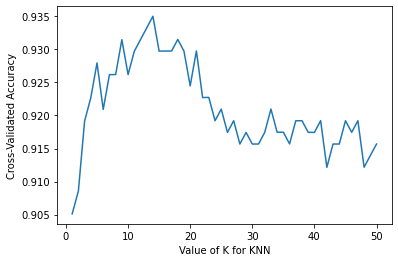

In [11]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 51
k_range = range(1, 51)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Inference: As You can see around kvalue 14 the highest is the Peak i.e arounnd 0.93